In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from time import time
from matplotlib import pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk import FreqDist
from nltk.util import ngrams
from nltk.tag import pos_tag
import seaborn as sns

In [4]:
dataset = pd.read_csv("terminated_trials_complete.csv")

In [22]:
dataset.head(3)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03427073,Dose-escalation Study of ALM201 in Patients Wi...,null,Terminated,No Results Available,Solid Tumors|Ovarian Cancer,Drug: ALM201,Characterization of the safety and tolerabilit...,Almac Discovery,...,"March 13, 2017",February 2018,"March 5, 2015","February 9, 2018",null,null,"February 2, 2018","February 9, 2018","Centre for Cancer Research and Cell Biology, Q...",https://ClinicalTrials.gov/show/NCT03427073
1,2,NCT03411460,Satisfaction of Hospitalized Diabetic Patients...,GLUCO FLASH,Terminated,No Results Available,Insulin-Dependent Diabetes,Device: FreeStyle Libre™ system|Procedure: Fin...,Satisfaction of patient-determined hospital ca...,Centre Hospitalier Universitaire de Nīmes,...,"August 23, 2017",January 2017,"June 16, 2017","January 26, 2018",null,null,"January 25, 2018","January 26, 2018","CHU Nimes, Nîmes, France",https://ClinicalTrials.gov/show/NCT03411460
2,3,NCT03411447,Impact of Early Enteral vs. Parenteral Nutriti...,null,Terminated,No Results Available,Acute Respiratory Failure|Shock,Other: Parenteral nutrition|Other: Enteral nut...,proportion of patients with abundant microaspi...,Centre Hospitalier Departemental Vendee|Minist...,...,"July 7, 2015",January 2018,"July 18, 2017","January 26, 2018",null,null,"January 25, 2018","January 26, 2018","CHU Amiens, Amiens, France|Centre hospitalier ...",https://ClinicalTrials.gov/show/NCT03411447


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 30 columns):
Rank                       14992 non-null int64
NCT Number                 14992 non-null object
Title                      14992 non-null object
Acronym                    14992 non-null object
Recruitment                14992 non-null object
Study Results              14992 non-null object
Conditions                 14992 non-null object
Interventions              13968 non-null object
Outcome Measures           14140 non-null object
Sponsor/Collaborators      14992 non-null object
Gender                     14992 non-null object
Age                        14992 non-null object
Phases                     10346 non-null object
Enrollment                 14992 non-null object
Funded Bys                 14992 non-null object
Study Type                 14992 non-null object
Study Designs              14923 non-null object
Other IDs                  14991 non-null object
Start Date

In [ ]:
#code for web scrapping 
#do not run this cell on your system for whole data
termination_reason = []

for i in dataset['URL']:
    page = requests.get(i)
    soup = BeautifulSoup(page.text, 'html.parser')
    why_stop = soup.find_all(class_='not-recruiting-status')
    temp=str(why_stop[0])
    if temp.find("(")==-1:
        reason = np.nan     
    else:
        reason = temp.split("(")[1].split(")")[0]
    termination_reason.append(reason)
    

In [102]:
termination_reason = pd.Series(termination_reason)

In [104]:
dataset["Why Stopped"] = termination_reason

In [105]:
dataset.head(5)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL,Why Stopped
0,1,NCT03427073,Dose-escalation Study of ALM201 in Patients Wi...,null,Terminated,No Results Available,Solid Tumors|Ovarian Cancer,Drug: ALM201,Characterization of the safety and tolerabilit...,Almac Discovery,...,February 2018,"March 5, 2015","February 9, 2018",null,null,"February 2, 2018","February 9, 2018","Centre for Cancer Research and Cell Biology, Q...",https://ClinicalTrials.gov/show/NCT03427073,ALM201/0001 was terminated after completion of...
1,2,NCT03411460,Satisfaction of Hospitalized Diabetic Patients...,GLUCO FLASH,Terminated,No Results Available,Insulin-Dependent Diabetes,Device: FreeStyle Libre™ system|Procedure: Fin...,Satisfaction of patient-determined hospital ca...,Centre Hospitalier Universitaire de Nīmes,...,January 2017,"June 16, 2017","January 26, 2018",null,null,"January 25, 2018","January 26, 2018","CHU Nimes, Nîmes, France",https://ClinicalTrials.gov/show/NCT03411460,logistical difficulties
2,3,NCT03411447,Impact of Early Enteral vs. Parenteral Nutriti...,null,Terminated,No Results Available,Acute Respiratory Failure|Shock,Other: Parenteral nutrition|Other: Enteral nut...,proportion of patients with abundant microaspi...,Centre Hospitalier Departemental Vendee|Minist...,...,January 2018,"July 18, 2017","January 26, 2018",null,null,"January 25, 2018","January 26, 2018","CHU Amiens, Amiens, France|Centre hospitalier ...",https://ClinicalTrials.gov/show/NCT03411447,stopped on Data Safety and Monitoring Board 's...
3,4,NCT03410628,Non-invasive Neurostimulation for the Relief o...,null,Terminated,No Results Available,Migraine,Device: gammaCore,Safety Evaluation,ElectroCore LLC,...,January 2018,"March 12, 2015","January 25, 2018",null,null,"January 18, 2018","January 25, 2018",NaN,https://ClinicalTrials.gov/show/NCT03410628,Company decision
4,5,NCT03407430,Trial of Pregabalin for GCSF-induced Bone Pain,null,Terminated,No Results Available,Breast Cancer|Lymphoma|Pain,Drug: Pregabalin/Placebo|Drug: Placebo/Pregabalin,Bone pain score - Value|Bone pain score - Prop...,UNC Lineberger Comprehensive Cancer Center|Pfizer,...,January 2018,"January 2, 2018","January 23, 2018",null,null,"January 16, 2018","January 23, 2018","North Carolina Cancer Hospital, Chapel Hill, N...",https://ClinicalTrials.gov/show/NCT03407430,Low patient accrual


In [109]:
dataset.to_csv("terminated_trials_complete.csv")

In [3]:
data=pd.read_csv('terminated_trials_complete.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 32 columns):
Unnamed: 0                 14992 non-null int64
Rank                       14992 non-null int64
NCT Number                 14992 non-null object
Title                      14992 non-null object
Acronym                    14992 non-null object
Recruitment                14992 non-null object
Study Results              14992 non-null object
Conditions                 14992 non-null object
Interventions              13968 non-null object
Outcome Measures           14140 non-null object
Sponsor/Collaborators      14992 non-null object
Gender                     14992 non-null object
Age                        14992 non-null object
Phases                     10346 non-null object
Enrollment                 14992 non-null object
Funded Bys                 14992 non-null object
Study Type                 14992 non-null object
Study Designs              14923 non-null object
Other IDs  

In [17]:
all_words=[]
stop_words=stopwords.words('english')
for sent in data['Why Stopped'].str.lower():
    if type(sent)!=float:
        for word in word_tokenize(sent):
            if word not in stop_words:
                all_words.append(word)

In [19]:
dist=FreqDist(all_words)

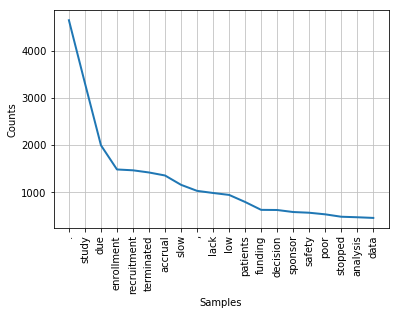

In [20]:
dist.plot(20)

In [23]:
lis=[]
for sent in  data['Why Stopped'].str.lower():
    if type(sent)!=float:
        lis.append(sent)

In [25]:
n_grams=[]
words=[]
for sent in lis:
    for word in sent.lower().split():
        if word not in stop_words:
            words.append(word)
for tup in ngrams(words,2):
        n_grams.append(tup)

In [26]:
n_grams_dist=FreqDist(n_grams)

In [30]:
word_pos=[]
for sent in lis:
    pl=pos_tag(sent.split())
    for index in range(len(pl)):
        if pl[index][1]=='JJ':
            if index<len(pl)-1:
                word_pos.append(pl[index][0]+' '+pl[index+1][0])

In [31]:
n_grams_dist_jj=FreqDist(word_pos)

In [32]:
n_grams_dist_jj.most_common()

[('due to', 1977),
 ('slow accrual', 335),
 ('unable to', 247),
 ('low accrual', 236),
 ('interim analysis', 214),
 ('low enrollment', 188),
 ('poor accrual', 154),
 ('slow enrollment', 145),
 ('detailed description.', 143),
 ('low recruitment', 141),
 ('slow recruitment', 130),
 ('principal investigator', 107),
 ('poor recruitment', 96),
 ('poor enrollment', 94),
 ('detailed description', 72),
 ('insufficient recruitment', 69),
 ('primary endpoint', 63),
 ('insufficient enrollment', 63),
 ('low accrual.', 57),
 ('low enrollment.', 49),
 ('early termination', 48),
 ('slow accrual.', 47),
 ('enough patients', 44),
 ('able to', 41),
 ('difficult to', 40),
 ('eligible patients', 40),
 ('poor accrual.', 38),
 ('accrual rate', 36),
 ('adverse events', 34),
 ('administrative reasons', 34),
 ('subject recruitment', 33),
 ('accrual and', 32),
 ('insufficient accrual', 30),
 ('early due', 28),
 ('patient recruitment', 27),
 ('patient population', 26),
 ('study drug', 26),
 ('sufficient data', 2

In [49]:
word_pos_3=[]
for sent in lis:
    words_nostop=[]
    for word in sent.split():
        if word not in stop_words:
             words_nostop.append(word)
    pl=pos_tag(words_nostop)
    for index in range(len(pl)):
        if pl[index][1]=='JJ':
            if index<len(pl)-2:
                word_pos_3.append(pl[index][0]+' '+pl[index+1][0]+' '+pl[index+2][0])

In [50]:
n_grams_dist_jj_3=FreqDist(word_pos_3)
n_grams_dist_jj_3.most_common()

[('due slow accrual', 59),
 ('due slow enrollment', 51),
 ('due low enrollment', 50),
 ('principal investigator left', 50),
 ('due poor accrual', 45),
 ('due slow recruitment', 43),
 ('due slow accrual.', 42),
 ('low recruitment rate', 40),
 ('due low enrollment.', 34),
 ('interim analysis showed', 34),
 ('due low accrual', 33),
 ('due low recruitment', 31),
 ('due poor accrual.', 27),
 ('detailed description termination', 27),
 ('due slow enrollment.', 24),
 ('due low accrual.', 24),
 ('due lack efficacy', 20),
 ('due poor enrollment', 19),
 ('due lack enrollment', 19),
 ('unable recruit sufficient', 19),
 ('early termination due', 18),
 ('low accrual rate', 18),
 ('due lack funding', 18),
 ('early due slow', 17),
 ('slow recruitment rate', 17),
 ('due low recruitment.', 16),
 ('due lack efficacy.', 16),
 ('due safety concerns.', 15),
 ('early due lack', 14),
 ('due lack enrollment.', 14),
 ('unable recruit subjects', 14),
 ('due slow recruitment.', 14),
 ('certain national health', 1

In [38]:
pos_tag(['shubh'])

[('shubh', 'NN')]

In [302]:
for sent in lis:
    if sent.find('potential')!=-1 and sent.find('concern')!=-1:
        print(sent)

due to potential concerns about liver safety 
there were no safety or effectiveness concerns. there were concerns about completing enrollment due to a competitive device's potential approval.
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to potential concerns about liver safety 
due to concerns about potential liver safety 
due to potential concerns about liver safety 
study terminated due to potential safety concerns in combination with platinum-based therapies
futility &amp; potential safety concern 


In [359]:
for sent in lis:
    if sent.find('descript')!=-1:
        print(sent)

see detailed description
see detailed description
see termination statement in the detailed description below
see termination reason in detailed description.
this study was terminated after a pre-specified interim analysis. please see detailed study description for further information.
see termination reason in detailed description.
see termination reason in detailed description.
see detailed description
see termination reason in detailed description.
see termination reason in detailed description.
see termination reason in detailed description.
see termination reason in detailed description.
see termination reason in detailed description.
see termination reason in detailed description.
the study was terminated based on interim analysis. see detailed description.
see termination reason in detailed description.
see termination reason in detailed description.
see termination reason in detailed description.
see termination reason in detailed description.
see termination reason in detailed

In [129]:
w=WordNetLemmatizer()

In [142]:
d=w.lemmatize('phones')

In [143]:
d

'phone'

In [153]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
a=st.stem('pythonly') 

In [186]:
w.lemmatize('recruit','n')

'recruit'

In [191]:
s='sufficiently'

In [192]:
s.find('sufficient')==0

True

In [196]:
data.duplicated(['Title','Why Stopped','Phases']).sum()

21

In [207]:
st=['braver']

In [208]:
pos_tag(st)

[('braver', 'NN')]

In [211]:
w.lemmatize(st[0],'a')

'brave'

In [235]:
s=set()
for sent in lis:
    for word in word_tokenize(sent):
        if word.find('accural')!=-1:
            s.add(word)
s

{'accural'}

In [362]:
s=set()
for sent in lis:
    for word in word_tokenize(sent):
        if word.find('acquis')==0:
            s.add(word)
s

{'acquisition'}

In [220]:
from nltk.tokenize import RegexpTokenizer

In [241]:
r=RegexpTokenizer(r'[A-Za-z]+')

In [349]:
s=set()
for sent in lis:
    for word in r.tokenize(sent):
        if word.find('accrual')==0:
            s.add(word)
s

{'accrual', 'accruals'}

In [301]:
l=[]
for sent in lis:
    for word in r.tokenize(sent):
        if word.find('buisness')==0:
            l.append(word)
len(l)

1

In [242]:
r.tokenize('non-5454enrollment')

['non', 'enrollment']

In [229]:
d='insufficient'

In [265]:
n_grams=[]
words=[]
for sent in lis:
    for word in r.tokenize(sent.lower()):
        if word not in stop_words:
            words.append(word)
for tup in ngrams(words,3):
        n_grams.append(tup)

In [266]:
fd=FreqDist(n_grams)
fd.most_common()

[(('study', 'terminated', 'due'), 290),
 (('see', 'termination', 'reason'), 152),
 (('termination', 'reason', 'detailed'), 151),
 (('reason', 'detailed', 'description'), 151),
 (('study', 'terminated', 'early'), 111),
 (('study', 'stopped', 'due'), 109),
 (('due', 'slow', 'accrual'), 103),
 (('due', 'low', 'enrollment'), 96),
 (('terminated', 'early', 'due'), 94),
 (('terminated', 'due', 'low'), 82),
 (('pi', 'left', 'institution'), 80),
 (('due', 'slow', 'enrollment'), 78),
 (('due', 'poor', 'accrual'), 73),
 (('accrual', 'slow', 'accrual'), 70),
 (('terminated', 'due', 'lack'), 69),
 (('investigator', 'left', 'institution'), 65),
 (('terminated', 'due', 'slow'), 65),
 (('due', 'low', 'accrual'), 63),
 (('enrollment', 'study', 'terminated'), 62),
 (('slow', 'accrual', 'slow'), 62),
 (('due', 'slow', 'recruitment'), 61),
 (('accrual', 'study', 'terminated'), 60),
 (('see', 'detailed', 'description'), 58),
 (('low', 'recruitment', 'rate'), 51),
 (('principal', 'investigator', 'left'), 5

In [363]:
reasons={
    'Insufficient Enrollment':['enrol','recruit','inclusion','candidate','subject','patient','participa'],
    'Slow Accural':['accural','accrual'],
    'Pricipal Investigator Left':['investigator'],
    'Interim Analysis':['interim'],
    'Insufficient Efficacy':['effic'],
    'Funding':['fund','financ'],
    'Safety Concerns':['safe'],
    'Company Decision(s)':['benefit','authorit'],
    'Due to Intervention':['intervent','injection'],
    'Sufficient Data collected':['suffic'],
    'Insufficient Data':['insuffic'],
    'No Longer relevant':['relevant'],
    'Administrative Reasons':['administ','committe','board'],
    'Adverse Events':['adverse','toxic','cardi'],
    'Business Decision':['business'],
    'Clinical Hold':['hold'],
    'Strategic Decision':['phase','probab'],
    'Key Staff Left':['staff'], 
    'Other':['descript','acquisition']
}

In [364]:
for i in reasons.keys():
    print(i)

Insufficient Enrollment
Slow Accural
Pricipal Investigator Left
Interim Analysis
Insufficient Efficacy
Funding
Safety Concerns
Company Decision(s)
Due to Intervention
Sufficient Data collected
Insufficient Data
No Longer relevant
Administrative Reasons
Adverse Events
Business Decision
Clinical Hold
Strategic Decision
Key Staff Left
Other


In [365]:
data_reasons=dict()

In [366]:
for reason in reasons.keys():
    data_reasons[reason]=np.zeros(len(data))

In [367]:
for index in range(len(data)):
    sent=data.loc[index,'Why Stopped']
    if type(sent)!=float:
        for word in r.tokenize(sent.lower()):
            for reason in reasons.keys():
                for val in reasons[reason]:
                    if word.find(val)==0:
                        data_reasons[reason][index]=1

In [368]:
data_reasons=pd.DataFrame(data_reasons)

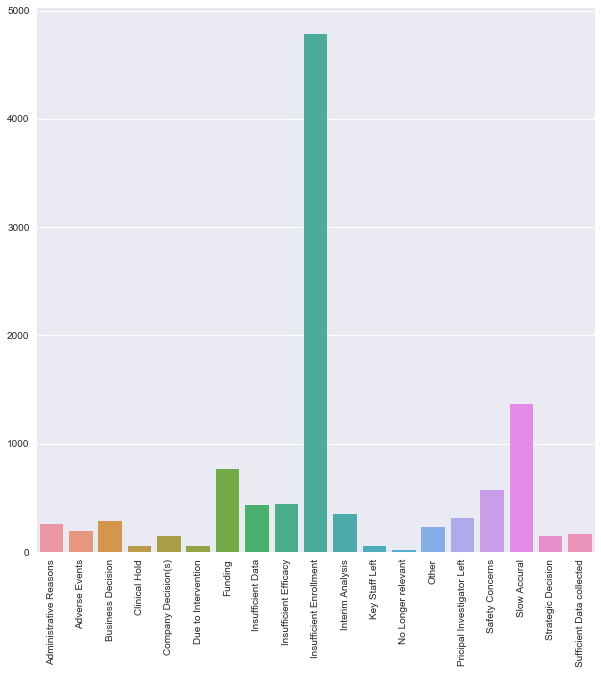

In [369]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(data_reasons.sum().index,data_reasons.sum().values)

In [370]:
#we can further divide them into some categories
categories={
    'Insufficient Enrollment':'Neutral',
    'Slow Accural':'Possibly Negative',
    'Pricipal Investigator Left':'Neutral',
    'Interim Analysis':'Neutral',
    'Insufficient Efficacy':'Negative Efficacy',
    'Funding':'Possibly Negative',
    'Safety Concerns':'Negative Safety',
    'Company Decision(s)':'Possibly Negative',
    'Due to Intervention':'Possibly Negative',
    'Sufficient Data collected':'Positive',
    'Insufficient Data':'Neutral',
    'No Longer relevant':'Neutral',
    'Administrative Reasons':'Possibly Negative',
    'Adverse Events':'Negative Safety',
    'Business Decision':'Possibly Negative',
    'Clinical Hold':'Neutral',
    'Strategic Decision':'Neutral',
    'Key Staff Left':'Neutral', 
    'Other':'Neutral'
}

In [371]:
categories={
    'Neutral':['Insufficient Enrollment','Pricipal Investigator Left','Interim Analysis','Insufficient Data',
               'No Longer relevant','Clinical Hold','Strategic Decision','Key Staff Left','Other'],
    'Possibly Negative':['Slow Accural','Company Decision(s)','Due to Intervention','Administrative Reasons',
                        'Funding','Business Decision'],
    'Negative Efficacy':['Insufficient Efficacy'],
    'Negative Safety':['Adverse Events','Safety Concerns'],
    'Positive':['Sufficient Data collected']
}

In [372]:
data_categories=dict()
counts=data_reasons.sum()
for category in categories.keys():
    data_categories[category]=0
for category in categories.keys():
    c=0;
    for val in categories[category]:
        c+=counts[val]
    data_categories[category]=c

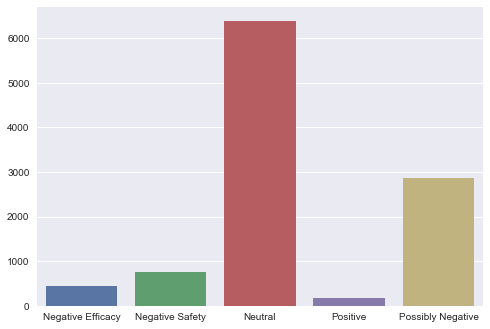

In [377]:
data_categories=pd.Series(data_categories)
sns.barplot(data_categories.index,data_categories.values)

In [383]:
from wordcloud import WordCloud

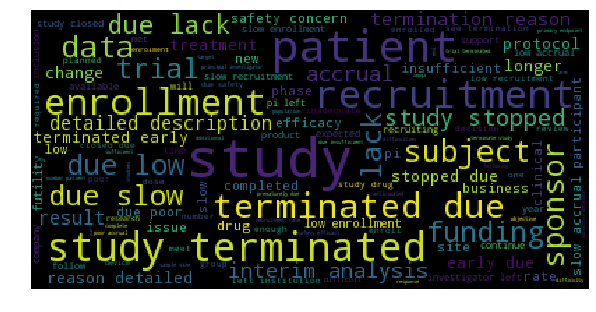

In [398]:
wordcloud = WordCloud(max_font_size=40).generate(all_sent)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [395]:
all_sent=''
for sent in lis:
    all_sent+=''.join(sent)

In [396]:
all_sent

'alm201/0001 was terminated after completion of part 1 to re-evaluate the biomarker strategy for patient recruitment to part 2logistical difficultiesstopped on data safety and monitoring board \'s requestcompany decisionlow patient accruala respiratory depression in remifentanyl groupthe interim data analysis shows no significant difference between groupsfailed to recruit sufficient subjectsdifficulty recruitinglow recruit rateethics committe decisionthe trial has terminated because of difficulties in study logistics and co-ordination.difficulties in recruitinginsufficient study staffdeadline of the end date of the inclusionsthe study expired at the irbsubstudy 001b is not required at this stage of the pipadministrativedifficult recruitment and end of funding.study not feasible in practisebased on interim review and decision to re-design the study.because at the interim analysis the pre-specified stopping boundary for an overwhelming benefit had been crossed.study terminated per ongoin

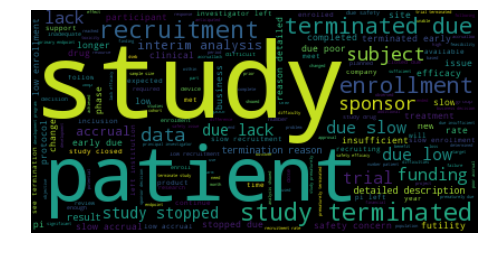

In [402]:
wc = WordCloud().generate(all_sent)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()